In [179]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv') #access the data

In [180]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
data = np.array(data)

#print(data)

m, n = data.shape
np.random.shuffle(data)
#print(data)
# Separate data for development (first 1000 data points)
data_dev = data[0 :1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # Normalize the features to range [0, 1]
#print(Y_dev)

# Separate data for training (remaining data points)
data_train = data[1000: m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.  # Normalize the features to range [0, 1]


print(data_train)
_, m_train = X_train.shape


# Assuming you have already defined X_train, Y_train, and m_train

batch_size = 128
num_batches = m_train // batch_size  # Calculate the number of complete batches
last_batch_size = m_train % batch_size  # Calculate the size of the last (potentially incomplete) batch

# Split the data into complete batches
complete_batches_X = np.array_split(X_train[:, :num_batches * batch_size], num_batches, axis=1)
complete_batches_Y = np.array_split(Y_train[:num_batches * batch_size], num_batches)

# Handle the last batch (if it's smaller than 128)
if last_batch_size > 0:
    last_batch_X = X_train[:, num_batches * batch_size:]
    last_batch_Y = Y_train[num_batches * batch_size:]
else:
    last_batch_X = None
    last_batch_Y = None

# Print the sizes of the batches
print(f"Number of complete batches: {num_batches}")
print(f"Size of last batch: {last_batch_size}")

# Example usage of batches (printing the sizes)
for i, batch_X in enumerate(complete_batches_X):
    print(f"Batch {i + 1} X shape: {batch_X.shape}")
    print(f"Batch {i + 1} Y shape: {complete_batches_Y[i].shape}")

# Print the last batch sizes (if applicable)
if last_batch_X is not None:
    print(f"Last Batch X shape: {last_batch_X.shape}")
    print(f"Last Batch Y shape: {last_batch_Y.shape}")


[[4 0 8 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Number of complete batches: 320
Size of last batch: 40
Batch 1 X shape: (784, 128)
Batch 1 Y shape: (128,)
Batch 2 X shape: (784, 128)
Batch 2 Y shape: (128,)
Batch 3 X shape: (784, 128)
Batch 3 Y shape: (128,)
Batch 4 X shape: (784, 128)
Batch 4 Y shape: (128,)
Batch 5 X shape: (784, 128)
Batch 5 Y shape: (128,)
Batch 6 X shape: (784, 128)
Batch 6 Y shape: (128,)
Batch 7 X shape: (784, 128)
Batch 7 Y shape: (128,)
Batch 8 X shape: (784, 128)
Batch 8 Y shape: (128,)
Batch 9 X shape: (784, 128)
Batch 9 Y shape: (128,)
Batch 10 X shape: (784, 128)
Batch 10 Y shape: (128,)
Batch 11 X shape: (784, 128)
Batch 11 Y shape: (128,)
Batch 12 X shape: (784, 128)
Batch 12 Y shape: (128,)
Batch 13 X shape: (784, 128)
Batch 13 Y shape: (128,)
Batch 14 X shape: (784, 128)
Batch 14 Y shape: (128,)
Batch 15 X shape: (784, 128)
Batch 15 Y shape: (128,)
Batch 16 X shape: (784, 128)
Batc

In [182]:
Y_train #check information

#X_train[0].shape


array([4, 0, 8, ..., 1, 1, 1])

<init_pragrams()>
The standardization of the weight matrices and bias vectors in the provided code snippet is done to initialize the neural network parameters with appropriate scaling, which can help improve the convergence and stability of the training process.

Below init_params() using the formular : 
np.random.normal(size=(rows, cols)) * np.sqrt(1./n)

1. Random Initialization: The weight matrices and bias vectors are initialized with random values drawn from a normal distribution with mean 0. This random initialization is crucial because it breaks the symmetry and allows different neurons in the network to learn different features during training.

2. Standard Deviation Scaling: The np.sqrt(1./n) term in the formula scales the random values by the square root of 1/n, where n is the number of neurons in the input layer. The choice of 1/n for scaling is a common heuristic used in neural network initialization.

3. Xavier (Glorot) Initialization: The use of np.sqrt(1./n) scaling is commonly known as Xavier (or Glorot) initialization, named after the researcher Xavier Glorot who introduced it in a research paper. Xavier initialization is widely used in deep learning models, especially in sigmoid and tanh activation functions. For <ReLU activation functions, a variation called He initialization is commonly used, where the scaling factor is np.sqrt(2./n) >.

4. Maintaining Signal Magnitudes: The scaling factor np.sqrt(1./n) is chosen to maintain the magnitudes of the signals flowing forward in the network during the initial stages of training. This helps in preventing the vanishing or exploding gradient problems that can hinder the training process. <By using this scaling, the activations and gradients are more likely to have similar magnitudes across different layers of the network, promoting more stable updates during backpropagation.>

5. Empirical Success: Xavier initialization has been empirically observed to work well in practice and has become a popular choice for weight initialization in many neural network architectures.

In [200]:
# def init_params():
#     W1 = np.random.rand(10, 784) -0.5
#     b1 = np.random.rand(10, 1) -0.5
#     W2 = np.random.rand(10, 10) -0.5
#     b2 = np.random.rand(10, 1) -0.5
#     return W1, b1, W2, b2

# update pramas
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

    # #fixed soft max: 
    # exp = np.exp(Z - np.max(Z)) #overflow np.max(Z)
    # return exp/exp.sum(axis =0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) +b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def gaussian_activation(x, sigma):
    return np.exp(-0.5 * (x**2) / (sigma**2))

def one_hot(Y):
    Y = Y.astype(int)  # Convert Y to integer type
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

print(Y_train)
print(Y_train.dtype)

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


[4 0 8 ... 1 1 1]
int64


In [201]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    # for i in range(iterations):
    #     Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    #     dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    #     W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    #     if i % 10 == 0:
    #         print("Iteration: ", i)
    #         predictions = get_predictions(A2)
    #         print(get_accuracy(predictions, Y))
    # return W1, b1, W2, b2

    m = X.shape[1]  # Total number of examples
    num_batches = m // batch_size  # Calculate the number of complete batches
    last_batch_size = m % batch_size  # Calculate the size of the last (potentially incomplete) batch

    for i in range(iterations):
        # Iterate over complete batches
        for j in range(num_batches):
            start_idx = j * batch_size
            end_idx = (j + 1) * batch_size
            batch_X = X[:, start_idx:end_idx]
            batch_Y = Y[start_idx:end_idx]

            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, batch_X)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, batch_X, batch_Y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        # Handle the last (potentially incomplete) batch
        if last_batch_size > 0:
            start_idx = num_batches * batch_size
            batch_X = X[:, start_idx:]
            batch_Y = Y[start_idx:]
            
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, batch_X)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, batch_X, batch_Y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            predictions = get_predictions(A2)
            print("Accuracy:", get_accuracy(predictions, Y))

    
    return W1, b1, W2, b2
# In this updated code, we added two additional loops to handle batches. We shuffle the data in each iteration to introduce randomness, and then we split the shuffled data into complete batches and handle the last (potentially incomplete) batch separately.

# now, when you call the gradient_descent function, you can specify the batch_size as an argument to indicate the desired batch size for training. For example, you can use gradient_descent(X_train, Y_train, alpha, iterations, batch_size=128) to perform gradient descent with batches of size 128.



In [208]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[8 5 1 ... 1 5 1] [4 0 8 ... 1 1 1]
Accuracy: 0.13887804878048782
Iteration:  10
[8 0 8 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.3533414634146341
Iteration:  20
[8 0 0 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.4404878048780488
Iteration:  30
[9 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.5839756097560975
Iteration:  40
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.6755121951219513
Iteration:  50
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.7112926829268292
Iteration:  60
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.7338780487804878
Iteration:  70
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.775829268292683
Iteration:  80
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.8020243902439025
Iteration:  90
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.8177560975609756
Iteration:  100
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.8293170731707317
Iteration:  110
[4 0 5 ... 1 1 1] [4 0 8 ... 1 1 1]
Accuracy: 0.8380975609756097
Iteration:  120
[4 0 5 ... 1 1 1] [4 0 

In [209]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


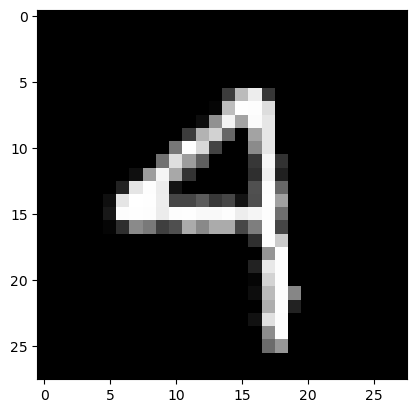

Prediction:  [0]
Label:  0


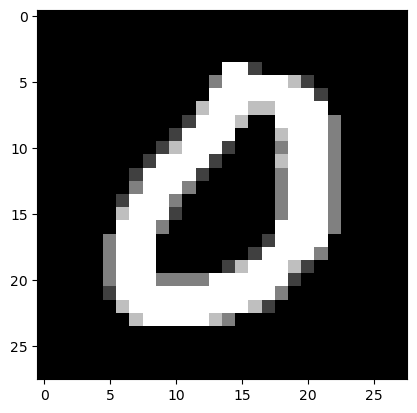

Prediction:  [5]
Label:  8


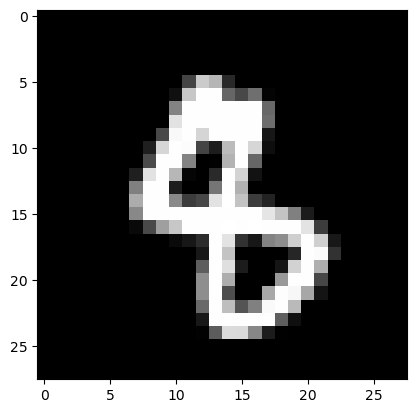

Prediction:  [2]
Label:  2


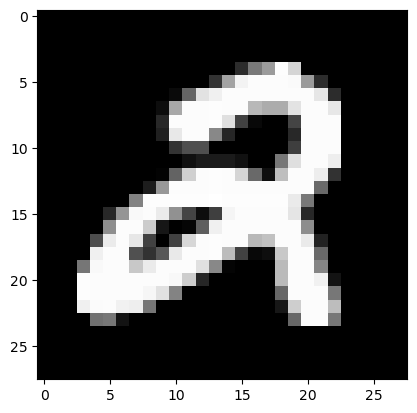

In [211]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [212]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 3 1 0 8 9 4 2 8 1 7 0 5 7 9 9 8 3 1 0 3 6 1 1 6 0 4 5 3 1 7 7 6 7 2 1 9
 1 6 4 7 4 2 5 1 0 9 9 9 6 7 2 8 6 2 4 0 4 3 7 5 9 2 0 4 3 3 8 7 9 2 2 1 5
 3 3 8 3 1 0 1 7 8 7 6 1 8 0 9 9 0 7 3 8 1 2 3 5 0 4 6 3 4 1 2 8 2 9 8 4 4
 0 4 3 4 8 1 6 3 5 0 0 8 7 3 8 9 1 9 3 9 9 6 7 5 7 9 7 8 8 0 0 2 2 5 1 7 1
 0 9 1 0 3 6 0 1 8 3 1 6 4 1 7 8 8 9 7 7 4 7 4 8 5 4 0 2 7 3 5 2 7 4 8 3 0
 1 6 6 7 0 8 2 0 9 4 7 7 1 1 6 3 7 1 4 9 1 8 6 3 3 4 7 4 3 5 8 9 8 5 2 9 7
 1 6 7 6 0 9 6 5 1 7 5 8 7 6 9 0 5 4 7 1 5 3 1 0 9 0 6 1 9 6 2 8 7 5 5 5 4
 1 6 3 7 2 2 8 4 6 0 4 1 3 3 3 9 6 4 2 0 6 9 7 2 5 2 8 4 3 5 3 4 0 4 1 3 8
 3 5 5 7 8 2 0 4 7 3 9 3 2 1 9 1 1 2 2 9 7 2 8 3 2 7 5 8 0 2 7 9 8 9 2 3 7
 6 2 8 6 5 3 7 2 7 6 7 2 0 8 4 5 5 1 5 3 7 0 9 7 3 5 3 7 1 3 1 6 5 8 5 3 3
 6 0 5 5 6 1 9 7 7 7 7 7 6 2 9 5 0 6 9 9 7 6 0 3 2 9 1 7 9 0 9 5 9 6 7 1 9
 3 9 1 9 1 7 5 7 7 6 0 4 7 3 1 1 1 2 6 9 5 4 7 5 7 4 1 3 5 9 9 6 9 1 5 5 3
 8 2 7 5 4 8 1 1 3 1 4 6 7 6 5 4 1 5 4 7 3 8 2 9 5 7 5 9 2 4 6 4 1 2 1 9 3
 3 2 2 0 8 0 2 5 0 0 8 7 

0.921